In [136]:
import pandas as pd

churn = pd.read_csv('Customer_Data.csv') 

# Data Exploration

In [137]:
churn.describe()

,revenue,App Usage,months,eqpdays,Mobile,Married,isMale,pcown,Credit Card,Retention Calls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,18.761908,325.695996,0.894704,0.363175,0.057163,0.501740,0.676931,0.044088,0.497162
std,44.163859,34.790147,9.548019,151.320700,0.306939,0.480922,0.232158,0.500005,0.467656,0.224552,0.500000
min,-5.860000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,11.000000,222.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,17.000000,334.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,24.000000,447.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,60.000000,600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [138]:
churn.isnull().any()

revenue            False
App Usage          False
months             False
eqpdays            False
Mobile             False
Married            False
isMale             False
pcown              False
Credit Card        False
Retention Calls    False
churndep           False
dtype: bool

# Data Treatment 

In [139]:
#I noticed that there are negative values in revenue and eqpdays, which is impossible. 
#So I removed those inaccurate records.
churn1 = churn.drop(churn[churn.revenue < 0].index)
churn2 = churn1.drop(churn1[churn1.eqpdays < 0].index)

In [140]:
churn2.describe()

,revenue,App Usage,months,eqpdays,Mobile,Married,isMale,pcown,Credit Card,Retention Calls,churndep
count,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000,31890.000000
mean,58.667202,24.952167,18.762026,325.695955,0.894701,0.363155,0.057165,0.501725,0.676952,0.044089,0.497178
std,44.163074,34.790412,9.548145,151.323073,0.306944,0.480916,0.232162,0.500005,0.467648,0.224556,0.500000
min,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,11.000000,222.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,17.000000,334.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,24.000000,447.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,60.000000,600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Training and Visualizing a Decision Tree

In [141]:
X = pd.DataFrame(churn2, columns = ["revenue", "App Usage", 
                                    "months",
                                   "eqpdays", "Mobile", 
                                   "Married", "isMale", 
                                   "pcown", "Credit Card", "Retention Calls"])
y = pd.DataFrame(churn2, columns = ["churndep"])

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [143]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [28]:
sudo apt-get install graphviz

SyntaxError: invalid syntax (<ipython-input-28-ed26e7b4d7d8>, line 1)

In [144]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import pydot 
import graphviz

import os
# you may have to modify the line below for the MAC. Essentially find the path for the `dot` executable, and add it 
# to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.40.1'

In [145]:
# Gini-model
clf_gini = tree.DecisionTreeClassifier(max_depth=6)
clf_gini = clf_gini.fit(X_train, y_train)
feature_names = list(X.columns)
gini_tree = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=feature_names,
                                class_names='01',
                                filled=True, rounded=True,  
                                special_characters=True)


In [146]:
# Information gain
clf_infoG = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf_infoG = clf_infoG.fit(X_train, y_train)
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(clf_infoG, out_file=None,
                                feature_names=feature_names,
                                class_names='01',
                                filled=True, rounded=True,  
                                special_characters=True)


In [54]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree3.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree3.dot')

# Write graph to a png file
graph.write_png('tree3.png'); 

NameError: name 'feature_list' is not defined

In [147]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(churn['churndep'])

# Remove the labels from the features, so we have one table for independent variables to predict
# (axis 1 refers to columns)
churn = churn.drop('churndep', axis = 1)

# Saving feature names for later use
feature_list = list(churn.columns)

# Convert to numpy array
churn = np.array(churn)

In [148]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(churn, labels, test_size = 0.25,
                                                                           random_state = 42)

In [149]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (23918, 10)
Training Labels Shape: (23918,)
Testing Features Shape: (7973, 10)
Testing Labels Shape: (7973,)


In [150]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [151]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: eqpdays              Importance: 0.5
Variable: revenue              Importance: 0.19
Variable: App Usage            Importance: 0.14
Variable: months               Importance: 0.09
Variable: Married              Importance: 0.02
Variable: pcown                Importance: 0.02
Variable: Credit Card          Importance: 0.02
Variable: Mobile               Importance: 0.01
Variable: isMale               Importance: 0.01
Variable: Retention Calls      Importance: 0.01


In [152]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

import os
# you may have to modify the line below for the MAC. Essentially find the path for the `dot` executable, and add it 
# to your PATH environment variable:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.40.1/'

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'churn.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('churn.dot')

# Write graph to a png file
graph.write_png('churn.png'); 

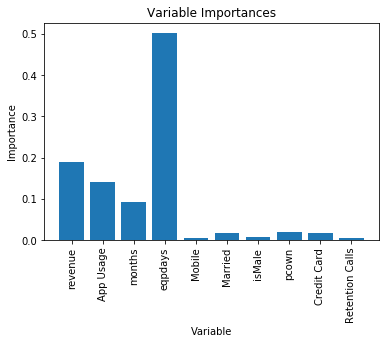

In [153]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [154]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_churn.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_churn.dot')

graph.write_png('small_tree_churn.png');

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 15 rows
features_calls = pd.read_csv('Customer_data.csv')
features_calls.head(15)

,revenue,App Usage,months,eqpdays,Mobile,Married,isMale,pcown,Credit Card,Retention Calls,churndep
0,83.53,20.00,31,219,1,0,0,1,0,4,1
1,29.99,0.00,52,331,0,0,0,1,1,3,1
2,37.75,2.67,25,112,0,0,0,1,1,3,1
3,5.25,0.00,45,213,0,0,0,0,0,2,1
4,42.71,8.67,27,488,1,0,0,1,0,3,1
5,53.69,15.00,23,287,1,0,0,1,1,3,1
6,33.66,8.33,31,89,1,0,0,1,0,2,1
7,52.56,80.00,33,161,1,0,0,0,1,3,1
8,22.50,8.67,37,340,1,0,0,0,0,3,1
9,98.47,24.67,35,241,0,0,1,1,1,3,1


In [157]:
X= features_calls.drop(columns=['churndep'],axis=1)
y= features_calls['churndep']

In [158]:
# import sklearn package to build the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

In [159]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)
model.fit(X_train,y_train)

C:\Users\Bibu\Anaconda3\envs\rstudio\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
predictions= model.predict(X_test)

In [161]:
from sklearn.metrics import classification_report

In [162]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.66      0.70      0.68      4681\n           1       0.70      0.66      0.68      4887\n\n   micro avg       0.68      0.68      0.68      9568\n   macro avg       0.68      0.68      0.68      9568\nweighted avg       0.68      0.68      0.68      9568\n'

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[3282, 1399],
       [1677, 3210]], dtype=int64)

In [164]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

67.85117056856187

In [165]:
model.predict([[0,0,0,0,0,0,0,0,1,0]])


array([1], dtype=int64)

# Model Evaluation

In [166]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3804  877]
 [1798 3089]]
Normalized confusion matrix
[[0.81 0.19]
 [0.37 0.63]]


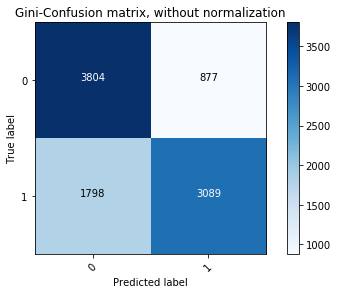

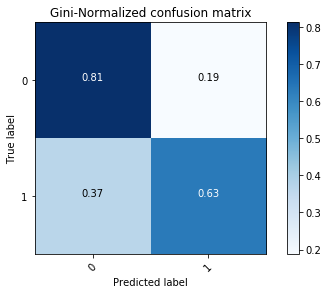

In [167]:
from sklearn.metrics import confusion_matrix

#gini model evaluation
y_pred_gini = clf_gini.fit(X_train, y_train).predict(X_test)               
gini_matrix = confusion_matrix(y_test, y_pred_gini)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(gini_matrix, classes='01',
                      title='Gini-Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(gini_matrix, classes='01', normalize=True,
                      title='Gini-Normalized confusion matrix')

plt.show()

In [168]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

gini_A = accuracy_score(y_test,y_pred_gini)
gini_P = precision_score(y_test,y_pred_gini)
gini_R = recall_score(y_test,y_pred_gini)
gini_F = f1_score(y_test,y_pred_gini)
gini_A

0.7204222408026756

In [169]:
gini_P

0.7788703983862834

In [170]:
gini_R

0.632085123797831

In [171]:
gini_F

0.6978425392522308

In [172]:
gini_classfication_error = 1 - gini_A

In [173]:
gini_classfication_error 

0.2795777591973244

Confusion matrix, without normalization
[[3804  877]
 [1796 3091]]
Normalized confusion matrix
[[0.81 0.19]
 [0.37 0.63]]


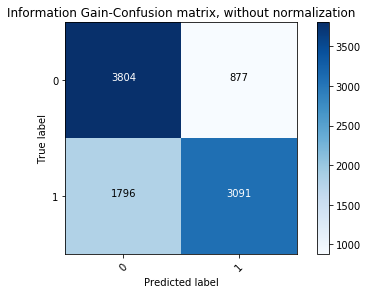

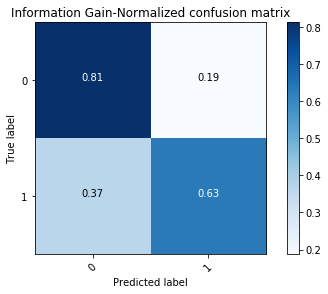

In [174]:
#information gain model evaluation
y_pred_infoG = clf_infoG.fit(X_train, y_train).predict(X_test)               
infoG_matrix = confusion_matrix(y_test, y_pred_infoG)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(infoG_matrix, classes='01',
                      title='Information Gain-Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(infoG_matrix, classes='01', normalize=True,
                      title='Information Gain-Normalized confusion matrix')

plt.show()

In [175]:
infoG_A = accuracy_score(y_test,y_pred_infoG)
infoG_P = precision_score(y_test,y_pred_infoG)
infoG_R = recall_score(y_test,y_pred_infoG)
infoG_F = f1_score(y_test,y_pred_infoG)
infoG_A

0.72063127090301

In [176]:
infoG_P

0.7789818548387096

In [177]:
infoG_R

0.6324943728258645

In [178]:
infoG_F

0.6981366459627328

In [179]:
infoG_classfication_error = 1 - infoG_A

In [180]:
infoG_classfication_error

0.27936872909698995

# Overview and Interpret

When the criterion is gain_ratio, the F-measure is 0.6432.
When the criterion is information_gain, the F-measure is 0.6416.
So, I chose gini_ratio as the splitting criterion.

With the model I built, I can predict whether a customer will leave or not with given data. For example:
Suppose a consumer can be described as: 
"revenue = 50", "outcalls = 13", "incalls = 2", "months = 25",
"eqpdays = 270", "webcap = 1", "marryyes = 0", "travel = 0", 
"pcown = 0", "creditcd = 1", "retcalls = 3"

In [181]:
clf_gini.predict([[300, 50, 25, 270, 1, 0, 0, 0, 1, 3]])
115.2,48.33,14,199,0,0,0,0,1,3


(115.2, 48.33, 14, 199, 0, 0, 0, 0, 1, 3)

In [182]:
clf_gini.predict([[115.2,1231,14,305,0,0,0,0,1,3]])


array([1], dtype=int64)

So I can know the consumer terminated the contract.